In [2]:
!pip install tensorflow
!pip install keras

    100% |################################| 3.3MB 17.0MB/s 
You are using pip version 18.0, however version 19.1.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
    100% |################################| 317kB 21.1MB/s 
    100% |################################| 61kB 29.1MB/s 
    100% |################################| 61kB 28.1MB/s 
You are using pip version 18.0, however version 19.1.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [3]:
from __future__ import absolute_import, division, print_function

import os

import tensorflow as tf
import keras
# from tensorflow import keras
print("TF Version: ", tf.__version__)

import numpy as np

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

/opt/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


TF Version:  1.10.0


In [4]:
zip_file = tf.keras.utils.get_file(origin="https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip", 
                                   fname="cats_and_dogs_filtered.zip", extract=True)
base_dir, _ = os.path.splitext(zip_file)

68608000/68606236 [==============================] - 1s 0us/step


In [5]:
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

# Directory with our training cat pictures
train_cats_dir = os.path.join(train_dir, 'cats')
print ('Total training cat images:', len(os.listdir(train_cats_dir)))

# Directory with our training dog pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')
print ('Total training dog images:', len(os.listdir(train_dogs_dir)))

# Directory with our validation cat pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')
print ('Total validation cat images:', len(os.listdir(validation_cats_dir)))

# Directory with our validation dog pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
print ('Total validation dog images:', len(os.listdir(validation_dogs_dir)))

Total training cat images: 1000
Total training dog images: 1000
Total validation cat images: 500
Total validation dog images: 500


In [6]:
image_size = 160
batch_size = 32

train_datagen = keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
validation_datagen = keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(image_size, image_size),
                                                    batch_size=batch_size,
                                                    class_mode='binary')

validation_generator = validation_datagen.flow_from_directory(validation_dir,
                                                              target_size=(image_size, image_size),
                                                              batch_size=batch_size,
                                                              class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [7]:
# !pip install tensorflow
# !pip install keras

In [8]:
IMG_SHAPE = (image_size, image_size, 3)

base_model = keras.applications.MobileNetV2(input_shape=IMG_SHAPE,
                                               include_top=False, 
                                               weights='imagenet')

9412608/9406464 [==============================] - 0s 0us/step


In [9]:
base_model.trainable = False #to prevent  mid model form training

In [11]:
# base_model.summary()

In [12]:
model =keras.Sequential([
    base_model,
    keras.layers.GlobalAveragePooling2D(),
    keras.layers.Dense(1, activation='sigmoid')
])

In [11]:
model.compile(optimizer=keras.optimizers.RMSprop(lr=0.0001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [12]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_160 (Model) (None, 5, 5, 1280)        2257984   
_________________________________________________________________
global_average_pooling2d_1 ( (None, 1280)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 1281      
Total params: 2,259,265
Trainable params: 1,281
Non-trainable params: 2,257,984
_________________________________________________________________


In [13]:
print(len(tf.trainable_variables(scope='dense_1')))
tf.trainable_variables(scope='dense_1')#the two Variables: W and B

2


[<tf.Variable 'dense_1/kernel:0' shape=(1280, 1) dtype=float32_ref>,
 <tf.Variable 'dense_1/bias:0' shape=(1,) dtype=float32_ref>]

In [14]:
# tf.get_collection(tf.GraphKeys.TRAINABLE_VARIABLES,'dense_1') #another way

In [15]:
# with tf.variable_scope('dense_1', reuse=tf.AUTO_REUSE):
#   tf.get_variable('kernel')

In [16]:
epochs = 10
steps_per_epoch = train_generator.n
validation_steps = validation_generator.n

history = model.fit_generator(train_generator,
                              steps_per_epoch = steps_per_epoch,
                              epochs = epochs,
                              workers=4,
                              validation_data = validation_generator,
                              validation_steps = validation_steps)
model.save('model_1.h5')

Epoch 1/10
2000/2000 [==============================] - 163s 82ms/step - loss: 0.2304 - acc: 0.9107 - val_loss: 0.1531 - val_acc: 0.9382
Epoch 2/10
2000/2000 [==============================] - 152s 76ms/step - loss: 0.1221 - acc: 0.9560 - val_loss: 0.1615 - val_acc: 0.9439
Epoch 3/10
2000/2000 [==============================] - 151s 75ms/step - loss: 0.0973 - acc: 0.9653 - val_loss: 0.1471 - val_acc: 0.9521
Epoch 4/10
2000/2000 [==============================] - 151s 75ms/step - loss: 0.0877 - acc: 0.9684 - val_loss: 0.1511 - val_acc: 0.9519
Epoch 5/10
2000/2000 [==============================] - 151s 75ms/step - loss: 0.0810 - acc: 0.9704 - val_loss: 0.1556 - val_acc: 0.9511
Epoch 6/10
2000/2000 [==============================] - 151s 75ms/step - loss: 0.0739 - acc: 0.9737 - val_loss: 0.1739 - val_acc: 0.9496
Epoch 7/10
2000/2000 [==============================] - 151s 76ms/step - loss: 0.0701 - acc: 0.9751 - val_loss: 0.1703 - val_acc: 0.9524
Epoch 8/10
2000/2000 [===================

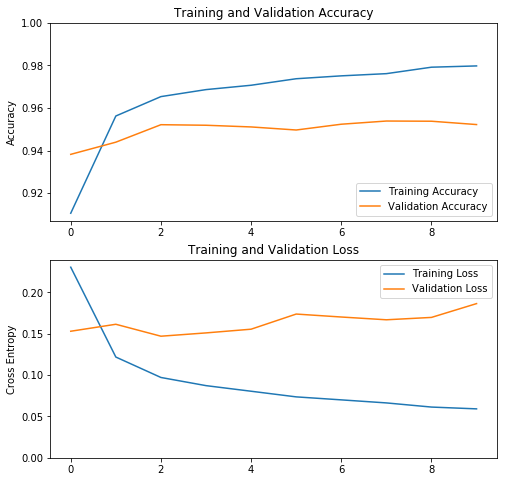

In [17]:
acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,max(plt.ylim())])
plt.title('Training and Validation Loss')
plt.show()

In [18]:
base_model.trainable = True

In [19]:
print("Number of layers in the base model: ", len(base_model.layers))

fine_tune_at = 100

for layer in base_model.layers[:fine_tune_at]:
    layer.trainable = False

Number of layers in the base model:  155


In [20]:
model.compile(loss='binary_crossentropy',
              optimizer = keras.optimizers.RMSprop(lr=2e-5),
              metrics=['accuracy'])

In [21]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_160 (Model) (None, 5, 5, 1280)        2257984   
_________________________________________________________________
global_average_pooling2d_1 ( (None, 1280)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 1281      
Total params: 2,259,265
Trainable params: 1,863,873
Non-trainable params: 395,392
_________________________________________________________________


In [22]:
len(tf.trainable_variables(scope=None))

272

In [ ]:
history_fine = model.fit_generator(train_generator,
                                   steps_per_epoch = steps_per_epoch,
                                   epochs = epochs,
                                   workers=4,
                                   validation_data=validation_generator,
                                   validation_steps=validation_steps)

model.save('model_2.h5')

Epoch 1/10
2000/2000 [==============================] - 225s 112ms/step - loss: 0.0087 - acc: 0.9974 - val_loss: 0.1253 - val_acc: 0.9710
Epoch 2/10
2000/2000 [==============================] - 219s 109ms/step - loss: 3.9980e-04 - acc: 0.9999 - val_loss: 0.1518 - val_acc: 0.9671
Epoch 3/10
2000/2000 [==============================] - 218s 109ms/step - loss: 8.1647e-04 - acc: 0.9998 - val_loss: 0.1637 - val_acc: 0.9731
Epoch 4/10
2000/2000 [==============================] - 218s 109ms/step - loss: 3.1465e-05 - acc: 1.0000 - val_loss: 0.1683 - val_acc: 0.9710
Epoch 5/10
2000/2000 [==============================] - 218s 109ms/step - loss: 1.1732e-04 - acc: 1.0000 - val_loss: 0.1982 - val_acc: 0.9661
Epoch 6/10
2000/2000 [==============================] - 218s 109ms/step - loss: 1.5677e-04 - acc: 1.0000 - val_loss: 0.1930 - val_acc: 0.9739
Epoch 7/10
2000/2000 [==============================] - 218s 109ms/step - loss: 4.2155e-04 - acc: 0.9999 - val_loss: 0.1834 - val_acc: 0.9732
Epoch 8/10

In [ ]:
acc += history_fine.history['acc']
val_acc += history_fine.history['val_acc']

loss += history_fine.history['loss']
val_loss += history_fine.history['val_loss']

In [ ]:
plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.ylim([0.9, 1])
plt.plot([epochs-1,epochs-1], plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.ylim([0, 0.2])
plt.plot([epochs-1,epochs-1], plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [9]:
!pip install --upgrade pip
!pip install opencv==2.4.9

Requirement already up-to-date: pip in /opt/anaconda3/lib/python3.6/site-packages (19.1.1)
  ERROR: Could not find a version that satisfies the requirement opencv==2.4.9 (from versions: none)
ERROR: No matching distribution found for opencv==2.4.9


In [3]:
from keras.models import load_model
import cv2
import numpy as np

model = load_model('model_1.h5')
# model.summary()
model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

img = cv2.imread('dogtest.jpg')
img = cv2.resize(img,(image_size,image_size))
img = np.reshape(img,[1,image_size,image_size,3])

classes = model.predict_classes(img)

print(classes)

/opt/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


ModuleNotFoundError: No module named 'cv2'